In [7]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from api_keys import geoapify_key

crime_data_df = pd.read_csv("../Resources/hate_crime.csv", low_memory=False)

In [8]:
crime_data_df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [9]:
clean_crime = crime_data_df.drop(columns=["ORI", "PUB_AGENCY_UNIT", "JUVENILE_VICTIM_COUNT","ADULT_VICTIM_COUNT", "ADULT_OFFENDER_COUNT", 'JUVENILE_OFFENDER_COUNT'])
clean_crime.columns
                                                 

Index(['INCIDENT_ID', 'DATA_YEAR', 'PUB_AGENCY_NAME', 'AGENCY_TYPE_NAME',
       'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME', 'REGION_NAME',
       'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC', 'INCIDENT_DATE',
       'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

In [12]:
# base_url = "https://api.geoapify.com/v2/places?" # YOUR CODE HERE
# units = "metric"

# state_data = []

# for city in enumerate('PUB_AGENCY_NAME'):
    
#     try:    
#     city_df = requests.get(city_url).json()
    
#     city_lat = city_weather["coord"]['lat']
#     city_lng = city_weather["coord"]['lon']

#     city_data.append({"City": city, 
#                      "Lat": city_lat, 
#                      "Lng": city_lng})

# city_url = f"{base_url}&appid={weather_api_key}&units={units}&q={city}"

In [19]:
# # Export the City_Data into a csv
# city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
years_df = clean_crime[["STATE_NAME", 'DATA_YEAR','INCIDENT_DATE']].copy()

In [15]:
years_df

,STATE_NAME,DATA_YEAR,INCIDENT_DATE
0,Arkansas,1991,31-AUG-91
1,Arkansas,1991,19-SEP-91
2,Arkansas,1991,04-JUL-91
3,Arkansas,1991,24-DEC-91
4,Arkansas,1991,23-DEC-91
...,...,...,...
201398,West Virginia,2018,14-DEC-18
201399,West Virginia,2018,14-NOV-18
201400,West Virginia,2018,26-NOV-18
201401,West Virginia,2018,31-JAN-18


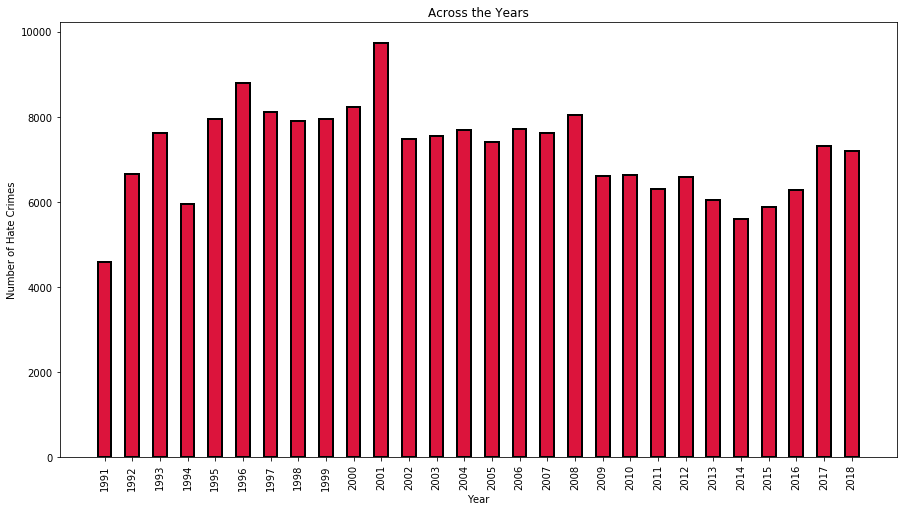

In [17]:
year_counts= years_df['DATA_YEAR'].value_counts()

x = year_counts.index.values
y = year_counts.values
plt.figure(figsize=(15, 8))

plt.bar(x, y, align='center', color='crimson', edgecolor="black", width= .5, linewidth=2)

plt.title("Across the Years")
plt.xlabel('Year')
plt.ylabel('Number of Hate Crimes')
plt.xticks(x, rotation='vertical')
plt.show()

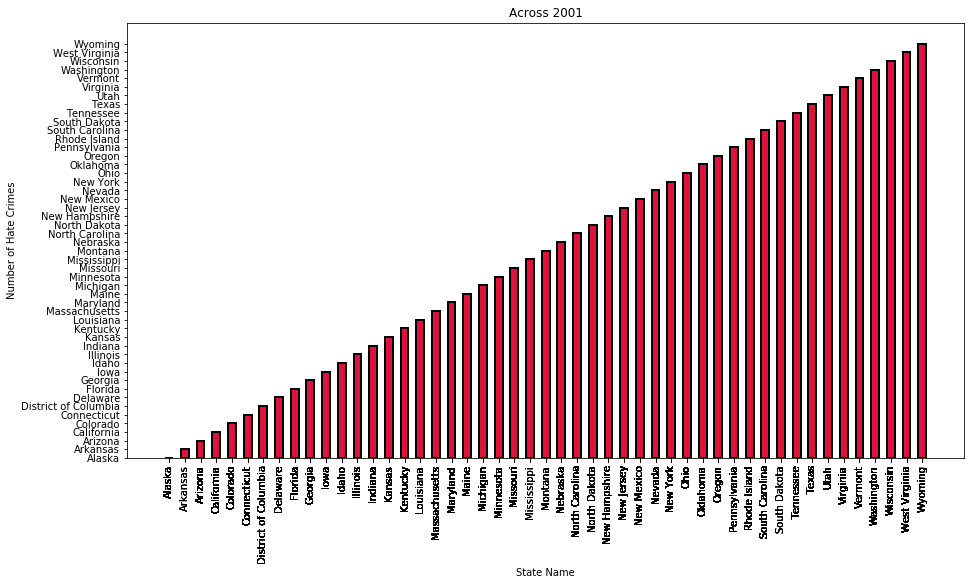

In [18]:
peak_year = years_df[years_df['DATA_YEAR'] == 2001]

names = peak_year['STATE_NAME']
state_counts = peak_year['STATE_NAME']

x = names
y = state_counts

plt.figure(figsize=(15, 8))

plt.bar(x, y, align='center', color='crimson', edgecolor="black", width= .5, linewidth=2)

plt.title("Across 2001")
plt.xlabel('State Name')
plt.ylabel('Number of Hate Crimes')
plt.xticks(x, rotation='vertical')
plt.show()

In [ ]:
peak_year['STATE_NAME'].values

array(['Alaska', 'Alaska', 'Alaska', ..., 'Wyoming', 'Wyoming', 'Wyoming'],
      dtype=object)

In [ ]:
peak_year.values

array([['Alaska', 2001, '14-JAN-01'],
       ['Alaska', 2001, '14-JAN-01'],
       ['Alaska', 2001, '14-JAN-01'],
       ...,
       ['Wyoming', 2001, '16-JUN-01'],
       ['Wyoming', 2001, '10-SEP-01'],
       ['Wyoming', 2001, '07-FEB-01']], dtype=object)

In [ ]:
(x.unique())

array(['Alaska', 'Arkansas', 'Arizona', 'California', 'Colorado',
       'Connecticut', 'District of Columbia', 'Delaware', 'Florida',
       'Georgia', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas',
       'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine',
       'Michigan', 'Minnesota', 'Missouri', 'Mississippi', 'Montana',
       'Nebraska', 'North Carolina', 'North Dakota', 'New Hampshire',
       'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia',
       'Wyoming'], dtype=object)

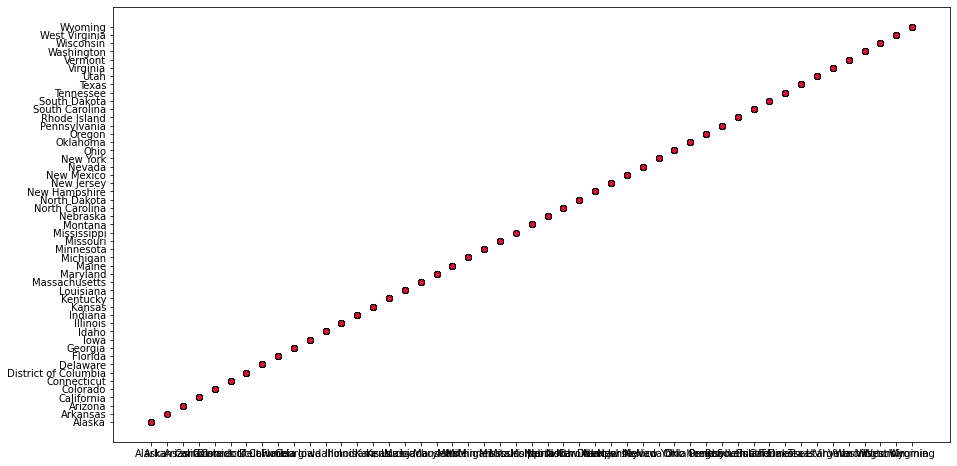

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(x, y, marker="o", facecolors="crimson", edgecolor="black" , alpha=0.75)
plt.show()

In [ ]:
Statetypes = clean_crime[["STATE_NAME", 'OFFENSE_NAME']].copy()